In [1]:
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


from keras.layers import BatchNormalization
from keras.regularizers import l2

**Load Dataset**

In [2]:
train_data_path='/content/drive/MyDrive/train'
validation_data_path='/content/drive/MyDrive/validation'

**Data preprocessing**

In [3]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [4]:
training_data=training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [5]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [6]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
valid_data =  valid_datagen.flow_from_directory(validation_data_path,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


**Show Image**

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

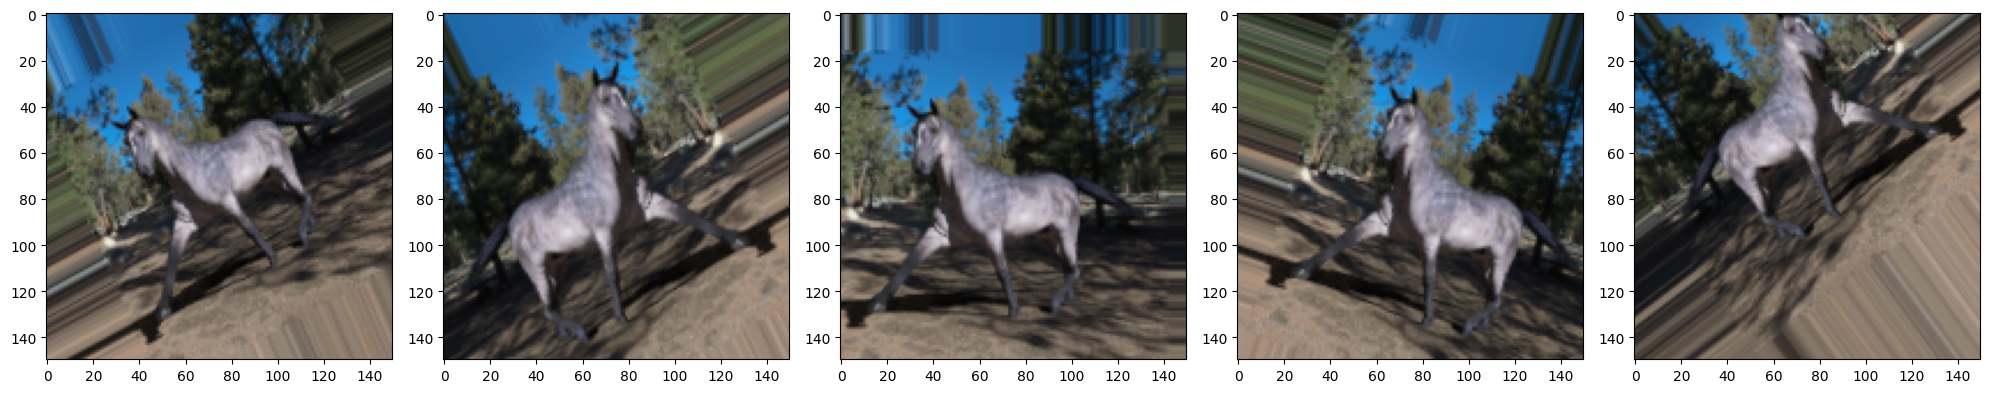

In [9]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

**Build CNN Model**

In [10]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l2=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile Model**

In [11]:
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Call Back**

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Path to save best model
model_path = '/content/drive/MyDrive/Call back Model/Horses or Humans.h5'

# Save best model (highest val_accuracy)
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

# Stop training if val_accuracy doesn't improve for 50 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50,
                               restore_best_weights=True, mode='max', verbose=1)

# Combine callbacks
callbacks_list = [checkpoint, early_stopping]

**Train Model**

In [13]:
history = cnn_model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.6133 - loss: 1.0564
Epoch 1: val_accuracy improved from -inf to 0.50781, saving model to /content/drive/MyDrive/Call back Model/Horses or Humans.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 916ms/step - accuracy: 0.6138 - loss: 1.0542 - val_accuracy: 0.5078 - val_loss: 0.6904
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.6677 - loss: 0.9334
Epoch 2: val_accuracy did not improve from 0.50781
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 576ms/step - accuracy: 0.6682 - loss: 0.9313 - val_accuracy: 0.5000 - val_loss: 0.9658
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.7235 - loss: 0.7280
Epoch 3: val_accuracy did not improve from 0.50781
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 592ms/step - accuracy: 0.7237 - loss: 0.7286 - val_accuracy: 0.5000 - val_loss: 0.9620
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7607 - loss: 0.6787
Epoch 4: val_accuracy did not improve from 0.50781
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 560ms/step - accuracy: 0.7604 - loss: 0.6793 - val_accuracy: 0.5000 - val_loss: 1.5391
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.7476 - loss: 0.7019
Epoch 5: val_accuracy did n

33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 639ms/step - accuracy: 0.7688 - loss: 0.6144 - val_accuracy: 0.5195 - val_loss: 1.5932
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.7952 - loss: 0.5891
Epoch 10: val_accuracy improved from 0.51953 to 0.53516, saving model to /content/drive/MyDrive/Call back Model/Horses or Humans.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 637ms/step - accuracy: 0.7951 - loss: 0.5895 - val_accuracy: 0.5352 - val_loss: 1.7916
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.8149 - loss: 0.5439
Epoch 11: val_accuracy improved from 0.53516 to 0.59766, saving model to /content/drive/MyDrive/Call back Model/Horses or Humans.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 646ms/step - accuracy: 0.8144 - loss: 0.5449 - val_accuracy: 0.5977 - val_loss: 1.1664
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.7774 - loss: 0.6504
Epoch 12: val_accuracy did not improve from 0.59766
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.7775 - loss: 0.6505 - val_accuracy: 0.5781 - val_loss: 1.3201
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.7897 - loss: 0.5838
Epoch 13: val_accuracy improved from 0.59766 to 0.73047, saving model to /content/drive/MyDrive/Call back Model/Horses or Humans.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 643ms/step - accuracy: 0.7897 - loss: 0.5831 - val_accuracy: 0.7305 - val_loss: 0.7756
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.7765 - loss: 0.5846
Epoch 14: val_accuracy did not improve from 0.73047
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 587ms/step - accuracy: 0.7769 - loss: 0.5838 - val_accuracy: 0.5273 - val_loss: 2.7506
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8090 - loss: 0.5811
Epoch 15: val_accuracy did not improve from 0.73047
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 632ms/step - accuracy: 0.8087 - loss: 0.5816 - val_accuracy: 0.5391 - val_loss: 2.1609
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.7993 - loss: 0.5738
Epoch 16: val_accuracy did not improve from 0.73047
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 558ms/step - accuracy: 0.7996 - loss: 0.5732 - val_accuracy: 0.5273 - val_loss: 4.8994
Epoch 17/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.7729 - loss: 0.5761
Epoch 17: val_accura

33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 601ms/step - accuracy: 0.8418 - loss: 0.4832 - val_accuracy: 0.9414 - val_loss: 0.2505
Epoch 25/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.8087 - loss: 0.5569
Epoch 25: val_accuracy did not improve from 0.94141
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 0.8080 - loss: 0.5584 - val_accuracy: 0.5195 - val_loss: 7.1035
Epoch 26/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.8347 - loss: 0.4617
Epoch 26: val_accuracy did not improve from 0.94141
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 571ms/step - accuracy: 0.8346 - loss: 0.4616 - val_accuracy: 0.5273 - val_loss: 5.1479
Epoch 27/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8317 - loss: 0.4650
Epoch 27: val_accuracy did not improve from 0.94141
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 551ms/step - accuracy: 0.8315 - loss: 0.4658 - val_accuracy: 0.5039 - val_loss: 10.6421
Epoch 28/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8131 - loss: 0.5212
Epoch 28: val_accur

**Sumaarize History for accuracy**

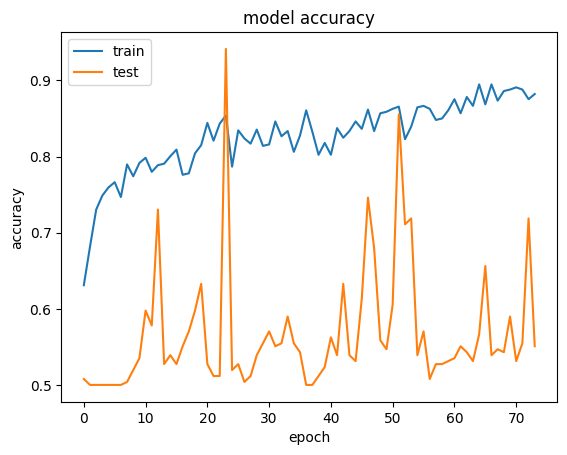

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Summarize History for loss accuracy**

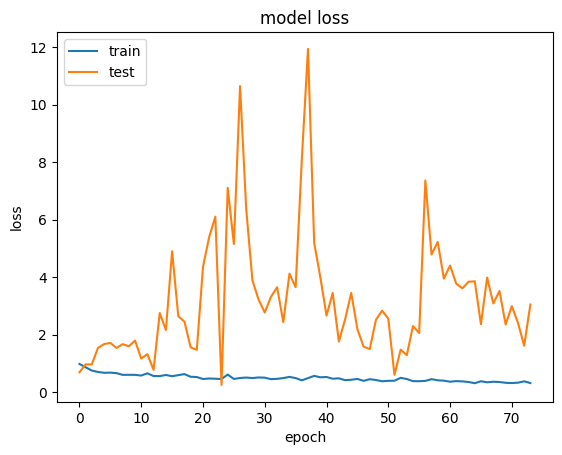

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Horses image path

h1='/content/drive/MyDrive/Horse or Human/h1.jpg'
h2='/content/drive/MyDrive/Horse or Human/h2.jpg'
h3='/content/drive/MyDrive/Horse or Human/h3.jpg'
h4='/content/drive/MyDrive/Horse or Human/h4.jpg'
h5='/content/drive/MyDrive/Horse or Human/h5.jpg'
h6='/content/drive/MyDrive/Horse or Human/h6.jpg'
h7='/content/drive/MyDrive/Horse or Human/h7.jpg'
h8='/content/drive/MyDrive/Horse or Human/h8.jpg'

# Humans image path

hue1='/content/drive/MyDrive/Horse or Human/hue1.jpg'
hue2='/content/drive/MyDrive/Horse or Human/hue2.jpg'
hue3='/content/drive/MyDrive/Horse or Human/hue3.jpg'
hue4='/content/drive/MyDrive/Horse or Human/hue4.jpg'
hue5='/content/drive/MyDrive/Horse or Human/hue5.jpg'
hue6='/content/drive/MyDrive/Horse or Human/hue6.jpg'
hue7='/content/drive/MyDrive/Horse or Human/hue7.jpg'
hue8='/content/drive/MyDrive/Horse or Human/hue8.jpg'


In [17]:
import numpy as np
from keras.preprocessing import image

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "--->>>", pred)

  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')

**Predict Output**

In [18]:
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8,hue1,hue2,hue3,hue4,hue5,hue6,hue7,hue8]:
  pred_human_horse(cnn_model, horse_or_human)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.893 0.107]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.989 0.011]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.387 0.613]] --->>> 1
Predicted>>> Human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.912 0.088]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.563 0.437]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.705 0.295]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.987 0.013]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.066 0.934]] --->>> 1
Predicted>>> Human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.98 0.02]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.055 0.945]] --->>> 1
Predicted>>> Human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.239 0.761]] --->>> 1
Predicted>>> Human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.724 0.276]] --->>> 0
Predicted>>> Horse
1/1 ━━━━━━━━━━━━━━━━